## エクセルで図表を作成するためのcsv出力

<ipython-input-1-d8cf1bd8a428>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'],format='%Y-%m-%d')


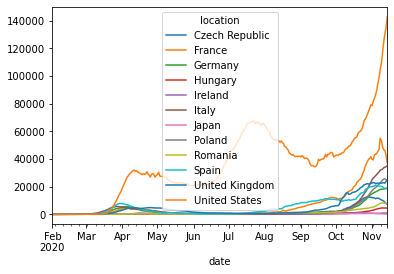

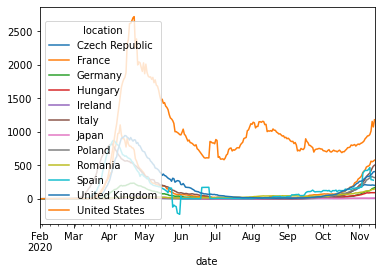

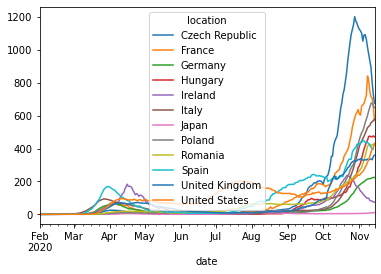

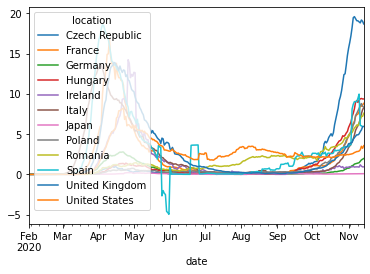

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 28 13:40:09 2020

@author: mayuoji
"""

##import lib
import csv
import requests
import io
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#import data
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
r = requests.get(url)
df = pd.read_csv(io.BytesIO(r.content))
df=df[['location','date','new_cases','new_deaths','new_cases_smoothed','new_deaths_smoothed','new_cases_per_million','new_deaths_per_million','new_cases_smoothed_per_million','new_deaths_smoothed_per_million']]


##new cases and deaths
##major
#df1=df[(df['location']=="Spain")|(df['location']=="Italy")|(df['location']=="France")|(df['location']=="United Kingdom")|(df['location']=="Germany")|(df['location']=="Czech Republic")|(df['location']=="Poland")|(df['location']=="Hungary")|(df['location']=="Romania")]
df1=df[(df['location']=="Ireland")|(df['location']=="Spain")|(df['location']=="United States")|(df['location']=="Japan")|(df['location']=="Italy")|(df['location']=="France")|(df['location']=="United Kingdom")|(df['location']=="Germany")|(df['location']=="Czech Republic")|(df['location']=="Poland")|(df['location']=="Hungary")|(df['location']=="Romania")]


##date range
df1['date']=pd.to_datetime(df1['date'],format='%Y-%m-%d')
df1=df1[df1['date'] >= dt.datetime(2020,2,1)] 


#plot
df1.groupby(['date','location']).sum()['new_cases_smoothed'].unstack().plot()
df1.groupby(['date','location']).sum()['new_deaths_smoothed'].unstack().plot()
df1.groupby(['date','location']).sum()['new_cases_smoothed_per_million'].unstack().plot()
df1.groupby(['date','location']).sum()['new_deaths_smoothed_per_million'].unstack().plot()

#export to csv
df1.groupby(['date','location']).sum()['new_cases_smoothed'].unstack().to_csv('new_case_smooth.csv')
df1.groupby(['date','location']).sum()['new_deaths_smoothed'].unstack().to_csv('new_death_smooth.csv')
df1.groupby(['date','location']).sum()['new_cases_smoothed_per_million'].unstack().to_csv('new_case_smooth_perm.csv')
df1.groupby(['date','location']).sum()['new_deaths_smoothed_per_million'].unstack().to_csv('new_death_smooth_perm.csv')

